In [30]:
import pandas as pd
import numpy as np
import welly
# import lasio

  

from scipy import integrate
from scipy import signal

%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
from welly import Well

w = Well.from_las('../data/well.las')


Header section Parameter regexp=~P was not found.


In [41]:
gr = np.array(w.data['GR'])

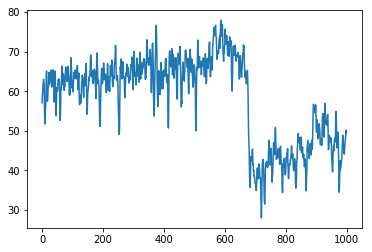

In [44]:
top=8000
base=9000
gr_interval=gr[top:base]
plt.plot(gr_interval)

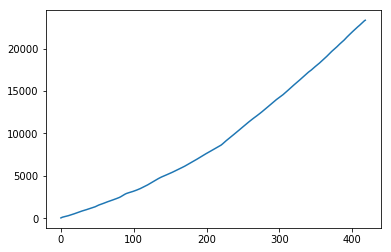

In [21]:
gr_interval
gr_interval_int=integrate.cumtrapz(gr_interval)
plt.plot(gr_interval_int)

In [17]:
gr_interval_int

23327.96

In [46]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(gr_interval, signal.ricker, widths)

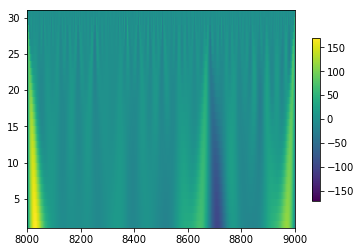

In [47]:
plt.imshow(cwtmatr, extent=[top, base, 1, 31], cmap='viridis', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar(shrink=0.75)
plt.show()
